# IMDB Dataset with RNN and LSTM

## Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBO3EXF/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBO3EXF/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBO3EXF/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 90s 145ms/step - loss: 0.6461 - accuracy: 0.6109 - val_loss: 0.5178 - val_accuracy: 0.7542
Epoch 2/10
391/391 [==============================] - 56s 142ms/step - loss: 0.4165 - accuracy: 0.8193 - val_loss: 0.5684 - val_accuracy: 0.6945
Epoch 3/10
391/391 [==============================] - 56s 142ms/step - loss: 0.4362 - accuracy: 0.8112 - val_loss: 0.5115 - val_accuracy: 0.7634
Epoch 4/10
391/391 [==============================] - 56s 143ms/step - loss: 0.3266 - accuracy: 0.8688 - val_loss: 0.4531 - val_accuracy: 0.8165
Epoch 5/10
391/391 [==============================] - 56s 141ms/step - loss: 0.2876 - accuracy: 0.8902 - val_loss: 0.4904 - val_accuracy: 0.7793
Epoch 6/10
391/391 [==============================] - 56s 142ms/step - loss: 0.2822 - accuracy: 0.8858 - val_loss: 0.4900 - val_accuracy: 0.8010
Epoch 7/10
391/391 [==============================] - 55s 139ms/step - loss: 0.2532 - accuracy: 0.9018 - val_loss: 0.4657 - val_ac

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

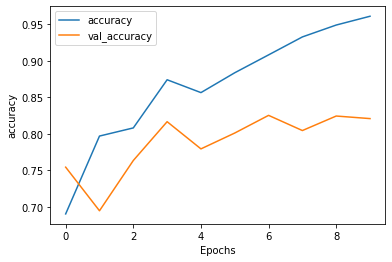

In [11]:
plot_graphs(history, 'accuracy')

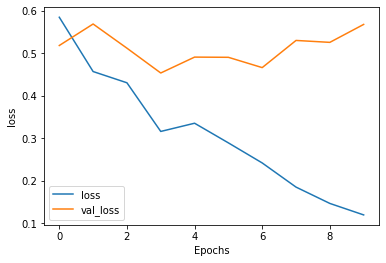

In [12]:
plot_graphs(history, 'loss')

## Multiple Layer LSTM

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [27]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [28]:
tokenizer = info.features['text'].encoder

In [29]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 105s 258ms/step - loss: 0.6975 - accuracy: 0.5445 - val_loss: 0.6490 - val_accuracy: 0.6213
Epoch 2/10
391/391 [==============================] - 100s 255ms/step - loss: 0.5560 - accuracy: 0.7281 - val_loss: 0.3516 - val_accuracy: 0.8508
Epoch 3/10
391/391 [==============================] - 99s 252ms/step - loss: 0.2693 - accuracy: 0.8956 - val_loss: 0.3121 - val_accuracy: 0.8678
Epoch 4/10
391/391 [==============================] - 99s 253ms/step - loss: 0.2058 - accuracy: 0.9244 - val_loss: 0.4125 - val_accuracy: 0.8472
Epoch 5/10
391/391 [==============================] - 101s 256ms/step - loss: 0.1407 - accuracy: 0.9521 - val_loss: 0.3985 - val_accuracy: 0.8601
Epoch 6/10
391/391 [==============================] - 100s 255ms/step - loss: 0.0916 - accuracy: 0.9718 - val_loss: 0.4273 - val_accuracy: 0.8692
Epoch 7/10
391/391 [==============================] - 99s 253ms/step - loss: 0.0634 - accuracy: 0.9823 - val_loss: 0.5405 - va

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

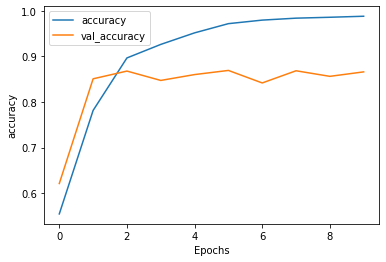

In [35]:
plot_graphs(history, 'accuracy')

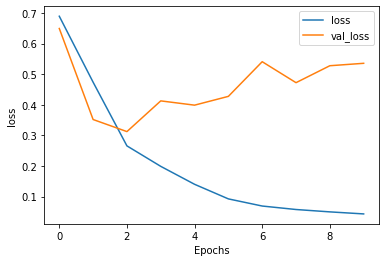

In [36]:
plot_graphs(history, 'loss')